In [1]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [3]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

# transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [9]:

transactions = pd.concat(
    (pd.read_csv("transactions_2014.csv"), 
     pd.read_csv("transactions_2015.csv")),
).drop(["Unnamed: 0"], axis=1)

In [10]:
transactions

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,False,1,2
1,2014-01-01,36,487,0.1948,False,False,1,2
2,2014-01-02,1,1875,0.7500,False,False,1,3
3,2014-01-02,2,2122,0.8488,False,False,1,3
4,2014-01-02,3,3350,1.3400,True,False,1,3
...,...,...,...,...,...,...,...,...
18341,2015-12-31,49,3828,1.5312,True,False,12,3
18342,2015-12-31,50,2948,1.1792,True,False,12,3
18343,2015-12-31,51,2892,1.1568,True,False,12,3
18344,2015-12-31,53,2300,0.9200,False,False,12,3


In [14]:
transactions = pd.concat(
    pd.read_excel("DataForChandler.xlsx", sheet_name=[1, 2]),  #  specify sheets 1 and 2 to grab correct years
    ignore_index=True  #  specify to create consecutive index across sheets
).drop(["Unnamed: 0"], axis=1)  #  drop index col

In [13]:
transactions

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,False,1,2
1,2014-01-01,36,487,0.1948,False,False,1,2
2,2014-01-02,1,1875,0.7500,False,False,1,3
3,2014-01-02,2,2122,0.8488,False,False,1,3
4,2014-01-02,3,3350,1.3400,True,False,1,3
...,...,...,...,...,...,...,...,...
35479,2015-12-31,49,3828,1.5312,True,False,12,3
35480,2015-12-31,50,2948,1.1792,True,False,12,3
35481,2015-12-31,51,2892,1.1568,True,False,12,3
35482,2015-12-31,53,2300,0.9200,False,False,12,3


In [15]:
del transactions

NameError: name 'transactions' is not defined

transactions

# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [17]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])
stores = pd.read_csv("../retail/stores.csv")

In [18]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [19]:
stores.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [21]:
# Inner join stores to retail on 'store_nbr' column

retail_stores = retail.merge(stores,
                             how="inner",
                             left_on="store_nbr",
                             right_on="store_nbr"
                            )
retail_stores

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


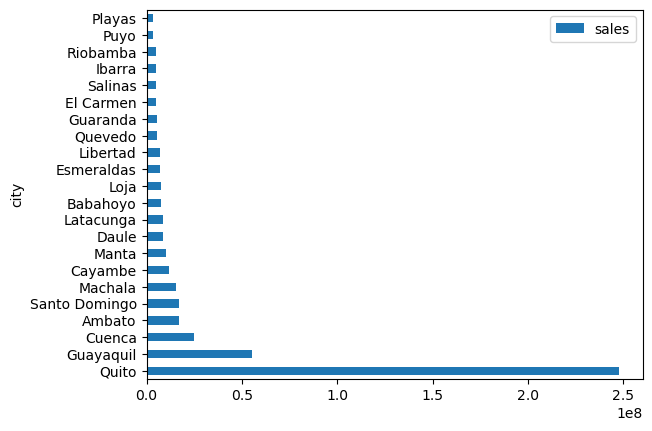

In [27]:
# Group joined DF by city, calculate sales by city, create bar plot from highest to lowest

(retail_stores
 .groupby(["city"])
 .agg({"sales": "sum"})
 .sort_values(by="sales", ascending=False
)).plot.barh();

In [29]:
# Create pivot table with date in index and type as column, cells are sum sales for type/day
# then create a line plot with increased figure size

retail_stores.pivot_table(
    index=["date"], 
    columns="type", 
    values="sales", 
    aggfunc="sum"
)

type,A,B,C,D,E
date,,,,,
2016-01-01,0.000000,0.000000,0.000000,16433.394000,0.000000
2016-01-02,379618.188950,161753.924970,160188.711980,311745.651960,53370.947002
2016-01-03,447037.130028,191999.867994,159407.764000,356319.037883,71971.919990
2016-01-04,302539.623005,130359.379032,144323.110965,324389.623090,54345.139005
2016-01-05,257060.245980,126464.769010,131458.040020,261540.672979,58796.711100
...,...,...,...,...,...
2017-08-11,293910.017024,111816.820980,117835.996000,243609.017008,59201.871010
2017-08-12,259813.825145,108583.105012,135502.780020,229040.695902,59690.129000
2017-08-13,296839.088030,130153.252046,122696.002969,241745.739426,74205.595000


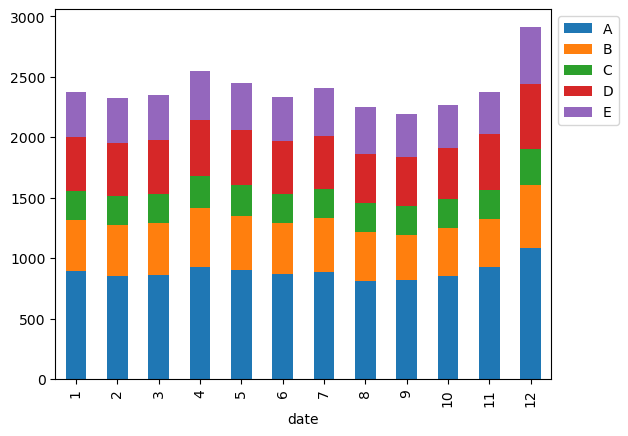

In [30]:
# Create pivot table with type in index and month as column, cells are sum sales for type/day
# Note: You may have chosen row as month and type as column, that's fine too!

retail_stores.pivot_table(
    index="type", 
    columns=retail_stores["date"].dt.month, 
    values="sales", 
    aggfunc="mean"
).T.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1)) # T, or transpose flips the DataFrame by its axes

In [31]:
# Deletion of the DataFrames used in join

del [retail, stores]